<a href="https://colab.research.google.com/github/PingPingE/Deeplearning_with_Keras/blob/master/day03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from tensorflow import keras
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#시각화를 위한 color 딕셔너리
color_dic = {0:['#005b6e','#04668c'],1:['#3c6ca7','#786eb7'],2:['#a86bba','#da66ac'],
             3:['#ff6792','#aa6792'],4:['#d8e0bb','#b6cec7'],5:['#ff5050','#ffaa00'],
            6:['#ff99ff','#ff6699',],7:['#e6f2ff','#99ccff'],8:['#ccccff','#cc99ff'],
            9:['#ff9966', '#ff6600']}

# 와인의 품질 분류하기
- fixed acidity	고정산, 와인의 산도를 제어								
- volatile acidity	휘발산, 와인의 향과 연관									
- citric acid	구연산, 와인의 신선함을 올림								
- residual sugar	잔여 당분, 와인의 단 맛 올림								
- chlorides	염화물, 와인의 짠 맛의 원인								
- free sulfur dioxide	황 화합물, 와인을 오래 보관하게 함							
- total sulfur dioxide	황 화합물, 와인을 오래 보관하게 함								
- density	밀도, 와인의 무게감을 나타냄							
- pH	산성도, 와인의 신 맛의 정도								
- sulphates	황 화합물, 와인을 오래 보관하게 함								
- alcohol	알코올, 와인의 단 맛과 무게감에 영향							
- quality	와인의 품질	3,4,5,6,7,8	
  - 상 : 7~9
  - 하 : 3~5
  - 중 : 상,하 아닌것.

In [23]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


In [24]:
wine_df = pd.concat([red, white])

In [25]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 전처리

- 상중하 분류

In [26]:
wine_df.loc[wine_df['quality'] <= 5, 'new_quality'] = 0
wine_df.loc[wine_df['quality'] == 6, 'new_quality'] = 1
wine_df.loc[wine_df['quality'] >= 7, 'new_quality'] = 2

In [27]:
wine_df.pop('quality')

0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64

In [28]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.829614
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.731124
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,2.000000


- 정규화

In [29]:
# 정규화 : minmax
wine_norm = (wine_df - wine_df.min()) / (wine_df.max() - wine_df.min())

# 결과확인
wine_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.5
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.5
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.5
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,1.0


In [30]:
# 섞기 frac=1이면 100%
wine_shuffle = wine_norm.sample(frac=1)

In [31]:
wine_shuffle

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
2439,0.289256,0.126667,0.222892,0.139571,0.054817,0.121528,0.285714,0.208020,0.589147,0.297753,0.275362,0.5
1931,0.272727,0.273333,0.132530,0.021472,0.063123,0.505208,0.694700,0.101986,0.403101,0.084270,0.434783,0.0
893,0.280992,0.386667,0.018072,0.026074,0.114618,0.052083,0.184332,0.198959,0.627907,0.196629,0.246377,0.0
2037,0.314050,0.140000,0.156627,0.090491,0.054817,0.107639,0.354839,0.140544,0.325581,0.140449,0.391304,0.0
3442,0.173554,0.126667,0.162651,0.067485,0.043189,0.045139,0.209677,0.066898,0.294574,0.061798,0.550725,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.413223,0.313333,0.024096,0.024540,0.182724,0.045139,0.115207,0.175246,0.379845,0.213483,0.420290,0.5
1579,0.198347,0.320000,0.054217,0.016871,0.073090,0.079861,0.059908,0.133218,0.635659,0.213483,0.478261,0.0
350,0.570248,0.393333,0.132530,0.032209,0.162791,0.055556,0.064516,0.256217,0.434109,0.426966,0.275362,0.5
1412,0.256198,0.146667,0.198795,0.053681,0.043189,0.086806,0.343318,0.103914,0.410853,0.320225,0.623188,1.0


In [32]:
# pandas to numpy
wine_np = wine_shuffle.to_numpy()

In [45]:
# 자료 80:20 으로 분할'
train_idx = int(len(wine_np) * 0.8)
X_train= wine_np[:train_idx, :-1]
y_train = wine_np[:train_idx, -1]

X_test= wine_np[train_idx:, :-1]
y_test = wine_np[train_idx:, -1]

- one-hot 인코딩

In [46]:
# one-hot으로 변경하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

### 모델링

In [56]:
wine_model = keras.Sequential([
                               keras.layers.Dense(units=128, activation = 'relu',input_shape=(11,)),
                               keras.layers.Dense(units=64, activation='relu'),
                               keras.layers.Dense(units=32, activation='relu'),
                               keras.layers.Dense(units=3, activation='softmax')
])

In [57]:
wine_model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
w_history= wine_model.fit(X_train, y_train, batch_size= 500, epochs=300, validation_split=0.2)

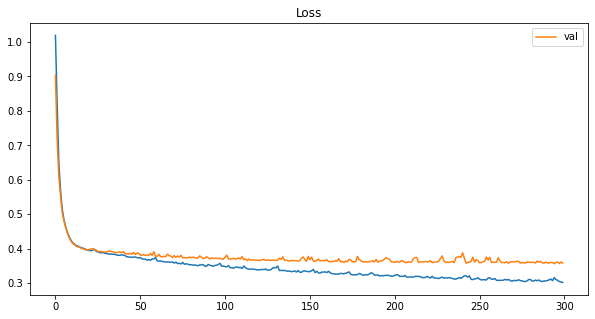

In [59]:
plt.figure(figsize=(10,5))
plt.title('Loss')
plt.plot(w_history.history['loss'])
plt.plot(w_history.history['val_loss'], label="val")
plt.legend()
plt.show()

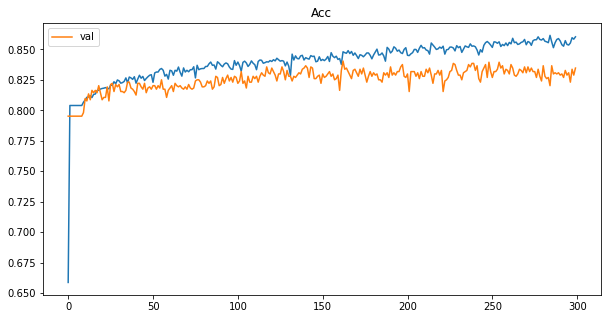

In [60]:
plt.figure(figsize=(10,5))
plt.title('Acc')
plt.plot(w_history.history['accuracy'])
plt.plot(w_history.history['val_accuracy'], label="val")
plt.legend()
plt.show()

In [61]:
wine_model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 847us/step - loss: 0.3447 - accuracy: 0.8369


[0.34473729133605957, 0.8369230628013611]

# iris 분류하기

In [241]:
# 분류하기

# 꽃받침 길이(Sepal Length)
# 꽃받침 폭(Sepal Width)
# 꽃잎 길이(Petal Length)
# 꽃잎 폭(Petal Width)

# setosa, versicolor, virginica의 세가지 붓꽃 종(species)

import os

train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url), origin=train_dataset_url)
print("데이터셋이 복사된 위치: {}".format(train_dataset_fp))

데이터셋이 복사된 위치: /root/.keras/datasets/iris_training.csv


In [242]:
import pandas as pd
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(train_dataset_fp, skiprows=1, names = column_names)
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


In [243]:
# 타입확인
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [244]:
# 타입변경 int
df['species'] = df['species'].astype('float64')

In [245]:
# 나누기
train_idx = int(len(df)*0.8)

df1 = df.iloc[:train_idx, :]
df2 = df.iloc[train_idx:, :]


X_train = df1.iloc[:, 0:4].to_numpy()
y_train = df1.iloc[:,4].to_numpy()

X_test = df2.iloc[:, 0:4].to_numpy()
y_test = df2.iloc[:,4].to_numpy()


In [246]:
# one - hot 
y_train = tf.keras.utils.to_categorical(y_train,num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [247]:
# model
i_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [250]:
i_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])
i_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 48)                240       
_________________________________________________________________
dense_43 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_44 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_45 (Dense)             (None, 3)                 39        
Total params: 1,755
Trainable params: 1,755
Non-trainable params: 0
_________________________________________________________________


In [ ]:
i_history =i_model.fit(X_train, y_train, batch_size=25, epochs= 200, validation_split = 0.2)

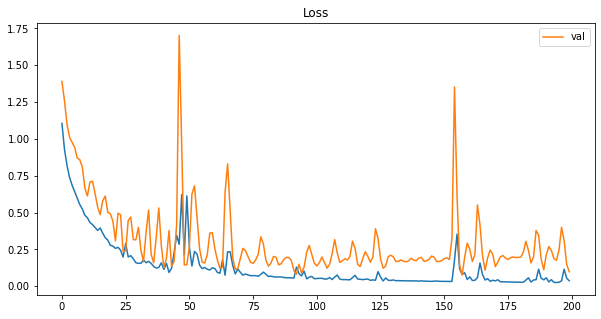

In [262]:
plt.figure(figsize= (10,5))
plt.title("Loss")
plt.plot(i_history.history['loss'])
plt.plot(i_history.history['val_loss'],label = 'val')
plt.legend()

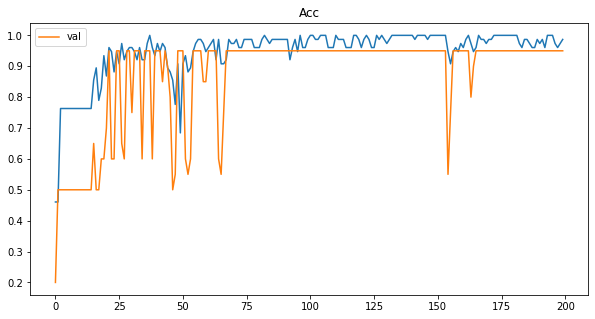

In [263]:
plt.figure(figsize= (10,5))
plt.title("Acc")
plt.plot(i_history.history['accuracy'])
plt.plot(i_history.history['val_accuracy'],label = 'val')
plt.legend()

### 테스트

In [265]:
i_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 1.0000


[0.037281397730112076, 1.0]

In [286]:
X_test.shape

(24, 4)

In [293]:
randidx = np.random.randint(X_test.shape[0], size=5)
for i in range(5):
  print('real: ', np.argmax(y_test[randidx[i]]),'prediction:',np.argmax(i_model.predict(X_test[randidx[i]].reshape(1,4))))

real:  0 prediction: 0
real:  1 prediction: 1
real:  1 prediction: 1
real:  0 prediction: 0
real:  1 prediction: 1


<br><br><br>


# 숫자 이미지 데이터 분류

In [206]:
# 이미지 받기
from tensorflow.keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data(path='minst.npz')

In [207]:
# 이미지 크기
X_train.shape


(60000, 28, 28)

In [208]:
X_test.shape

(10000, 28, 28)

In [209]:
# 이미지 내용
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [210]:
y_train[0]

5

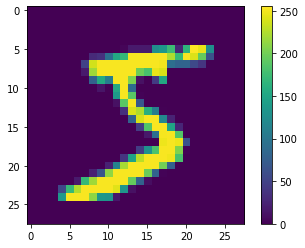

In [211]:
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [212]:
#0~59999 사이의 랜덤 숫자 3개를 꺼내서 화면에 표시하기
random_idx = np.random.randint(60000, size=3)
random_idx

array([39053, 55273, 33799])

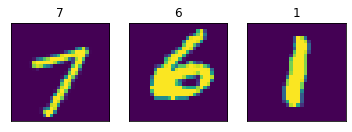

In [213]:
np.random.seed(1)
for i in range(3):
  img = X_train[random_idx[i]]
  plt.subplot(1,3,i+1)
  plt.title(y_train[random_idx[i]])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(img)
plt.show()

### 전처리

In [214]:
X_train = X_train/255.0
X_test - X_test/255.0

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [215]:
#label 범주형으로
y_train= tf.keras.utils.to_categorical(y_train, num_classes= 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes =10)

In [216]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 모델링

In [217]:
m_model = keras.Sequential([
                            keras.layers.Flatten(input_shape = (28,28)),
                            keras.layers.Dense(units=128 , activation = 'relu', input_shape =(784,)),
                            keras.layers.Dense(units=64, activation = 'relu'),
                            keras.layers.Dense(units=10, activation = 'softmax')
                  
])

In [218]:
m_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [219]:
m_model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
m_history = m_model.fit(X_train, y_train, batch_size= 2000, epochs= 150, validation_split=0.2, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20))

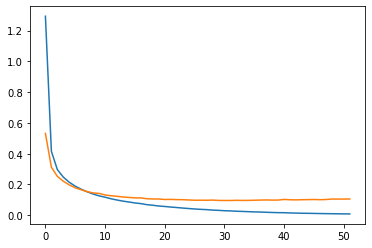

In [221]:
plt.plot(m_history.history['loss'])
plt.plot(m_history.history['val_loss'],label='val')

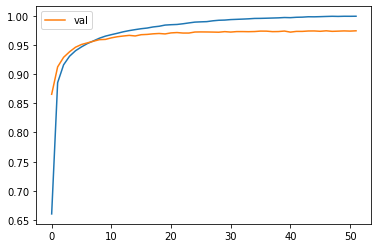

In [222]:
plt.plot(m_history.history['accuracy'])
plt.plot(m_history.history['val_accuracy'],label='val')
plt.legend()

### 테스트

In [223]:
# 정확도 확인
x1 = m_model.evaluate(X_test, y_test, verbose=1) 

313/313 [==============================] - 1s 2ms/step - loss: 17.9641 - accuracy: 0.9745


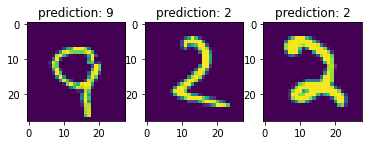

In [224]:
# 랜덤으로 3개의 숫자를 생성
random_idx = np.random.randint(10000, size=3)

for i in range(3):
  plt.subplot(1,3,i+1)
  x2 = m_model.predict(X_test[ random_idx[i] ].reshape(1, 28, 28))
  plt.title(f"prediction: {np.argmax(x2)}")
  plt.imshow(X_test[random_idx[i]])

<br><br><br>

#의류 이미지 분류

### 데이터 확인

In [297]:
import tensorflow as tf
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [299]:
X_train.shape

(60000, 28, 28)

In [300]:
X_train.shape

(60000, 28, 28)

In [306]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

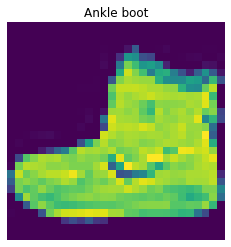

In [334]:
plt.imshow(X_train[0])
plt.axis('off')
plt.title(class_names[y_train[0]])
plt.show()

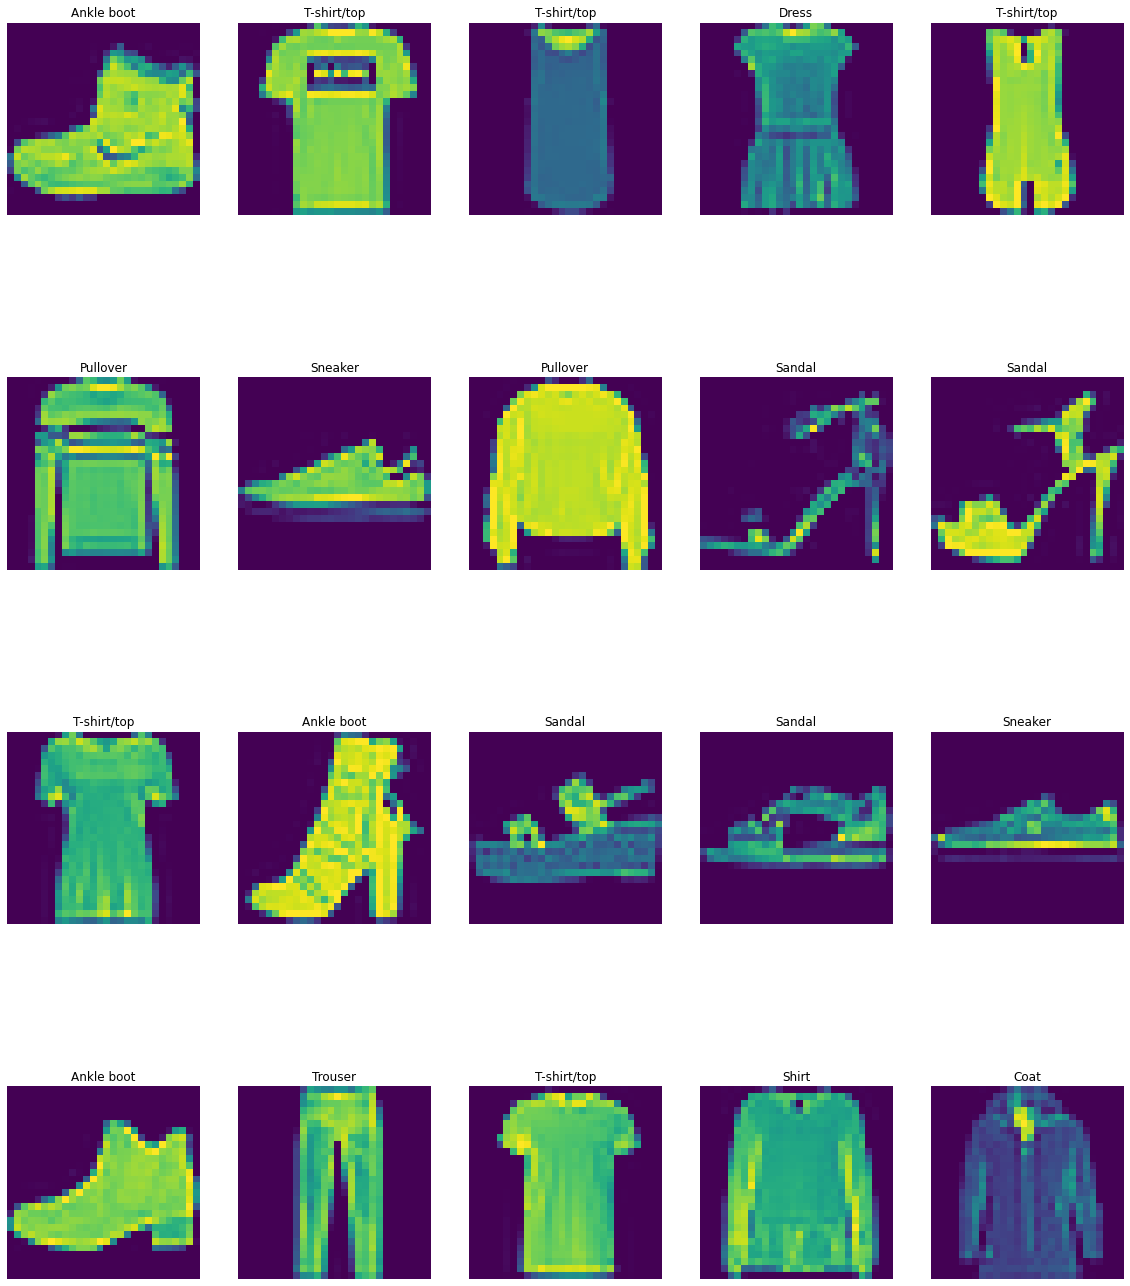

In [330]:
plt.figure(figsize=(20,25))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.title(class_names[y_train[i]])
  plt.imshow(X_train[i])
  plt.axis('off')
plt.show()

### 전처리

In [343]:
X_train.min()

0

In [344]:
X_train.max()

255

In [345]:
X_test.max()

255

- 스케일링

In [346]:
X_train = X_train/255
X_test = X_test/255

- 원핫인코딩

In [350]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes= 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes= 10)

In [351]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [353]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 모델링

In [354]:
X_train.shape

(60000, 28, 28)

In [380]:
c_model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(units= 256, activation='relu',input_shape=(28*28, )),
                            keras.layers.Dense(units= 128, activation='relu'),
                            keras.layers.Dense(units= 64, activation='relu'),
                            keras.layers.Dense(units=10, activation='softmax')
])

In [381]:
c_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_54 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_55 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_56 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [382]:
c_model.compile(optimizer= keras.optimizers.Adam(lr=0.001), loss= 'categorical_crossentropy', metrics=['accuracy']) #sparse_categorical_crossentropy를 손실함수로 적용하면, 인코딩 할 필요 없이 정수 그대로(0~9) 넣어주면 된다

In [ ]:
c_history = c_model.fit(X_train, y_train, batch_size= 5000, epochs=200, callbacks = keras.callbacks.EarlyStopping(patience=50),validation_split=0.2)

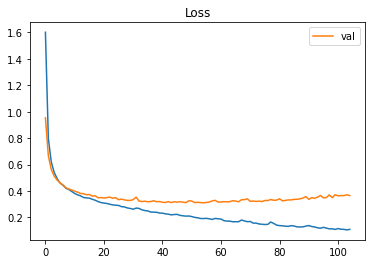

In [384]:
plt.title('Loss')
plt.plot(c_history.history['loss'])
plt.plot(c_history.history['val_loss'],label='val')
plt.legend()
plt.show()

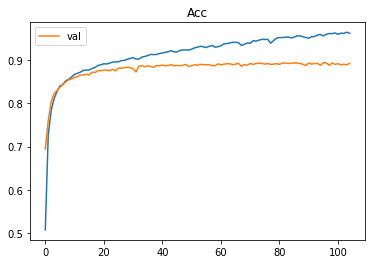

In [385]:
plt.title('Acc')
plt.plot(c_history.history['accuracy'])
plt.plot(c_history.history['val_accuracy'],label='val')
plt.legend()
plt.show()

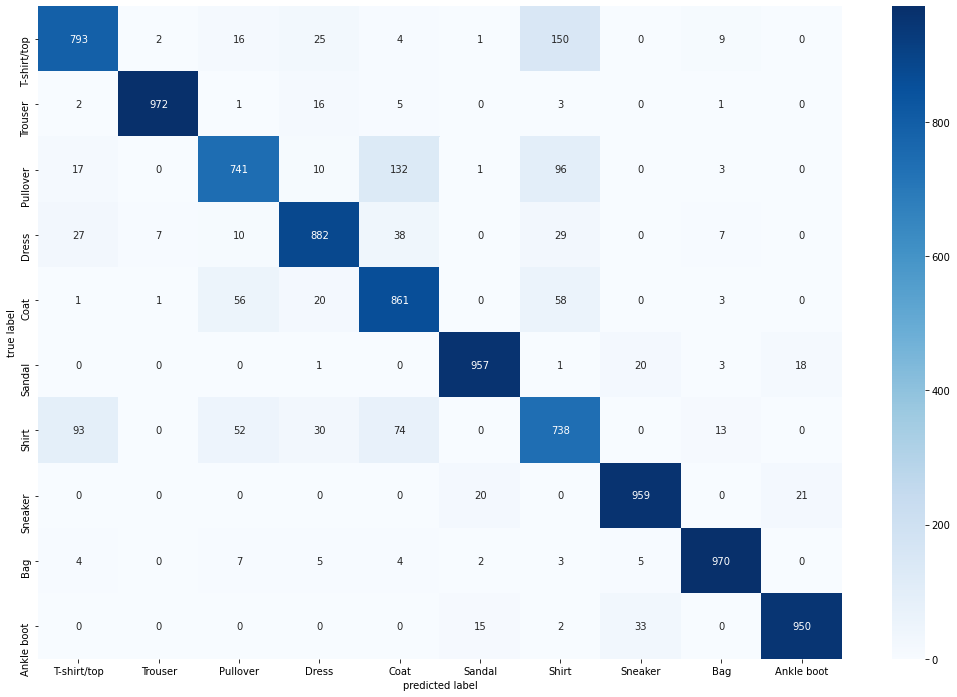

In [446]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(18,12))
cm2 = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(c_model.predict(X_test), axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

### 테스트

In [388]:
c_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8823


[0.4047031104564667, 0.8823000192642212]

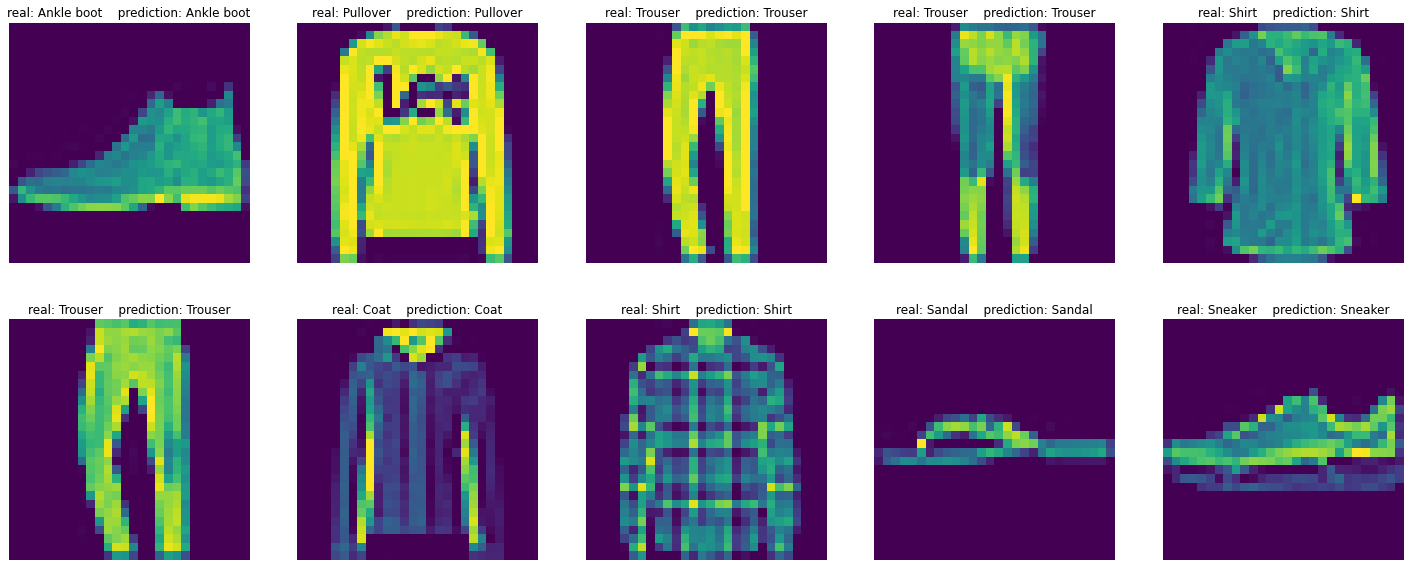

In [389]:
plt.figure(figsize= (25,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title(f"real: {class_names[np.argmax(y_test[i])]}    prediction: {class_names[np.argmax(c_model.predict(X_test[i].reshape(1,28,28)))]}")
plt.show()